In [41]:
import yaml
import torch
%load_ext autoreload
%autoreload 2
from aircraft_env import Location
from aircraft_env import AircraftEnv
from a2c.a2c_agent import A2CAgent
import numpy as np
with open('a2c/config.yaml') as f:
    templates = yaml.safe_load(f)
loc_1 = Location(45.46873715, -73.74257166095532)
loc_2 = Location(49.0068908, 2.5710819691019156)
loc_1, loc_2
env = AircraftEnv(arrival_location=loc_1, destination=loc_2, n_waypoints=9)
# agent = DQNAgent(templates, env=env, model_type=Net)
agent = A2CAgent(templates, env)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Actions Number 150


In [42]:
agent.train()

Episode: 99900: 100%|██████████| 100000/100000 [07:09<00:00, 232.75it/s]


In [ ]:
np.array([[0.0000, 0.2354, 0.2104, 0.2870, 0.2671],
        [0.1659, 0.2047, 0.1848, 0.2347, 0.2099],
        [0.0000, 0.2354, 0.2104, 0.2870, 0.2671]]).sum(axis=1)

In [43]:
from utils.env_extra import env_summary
df = env_summary(env, agent=agent, random=False)
df

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        9.3435e-07, 7.1606e-07, 1.2202e-06, 6.5952e-07, 1.2054e-06, 7.8229e-07,
        3.4302e-05, 2.6439e-05, 2.5621e-04, 1.0990e-04, 2.7551e-05, 2.8789e-05,
        9.6921e-01, 8.5562e-03, 2.4266e-04, 1.3397e-04, 5.0165e-05, 3.4601e-04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        7.5790e-07, 1.3310e-06, 7.9066e-07, 1.1476e-06, 1.0387e-06, 6.7456e-07,
        1.1967e-04, 3.4111e-05, 1.7588e-05, 2.2307e-05, 2.6559e-04, 8.4642e-05,
        1.1442e-04, 5.0107e-05, 4.1975e-05, 7.7686e-05, 2.4678e-05, 1.1758e-04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        7.3937e-07, 8.7535e-07, 8.6610e-

,trajectory,waypoint,speed,tas,distance,wind_magnitude,wind_direction,course,correction_angle,altitude,time_for_distance,fuel_burn,total_time,reward,fuel_flow,mach_number
0,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0,0.00
1,0,1,227.535946,223.910706,699708.284530,3.930965,71.027558,48.473464,-0.385814,10209.6,3075.154929,1177.963802,0.000000,822.036198,0.38305835935128807,0.75
2,0,2,216.921813,221.901526,692625.754972,6.226919,204.544757,61.933532,-0.976344,10819.2,3192.974216,1162.470951,3075.154929,837.529049,0.36407151200493226,0.75
3,0,3,219.398607,221.302120,692626.778829,21.894781,336.606282,68.750735,5.673923,11428.8,3156.933354,1095.079250,6268.129145,904.920750,0.34688069954760414,0.75
4,0,4,218.884311,221.302120,692627.408837,37.808945,165.255611,76.520012,-9.834687,12038.4,3164.353832,1050.073973,9425.062499,949.926027,0.3318446764316584,0.75
5,3,5,223.406036,224.252815,708721.992850,35.106116,184.117391,97.236048,-8.993082,12038.4,3172.349344,1070.847745,12589.416331,929.152255,0.3375566903337691,0.76
6,3,6,212.004756,236.055595,692639.804424,25.532381,294.442448,93.701063,2.195299,12038.4,3267.095588,1182.275062,15761.765675,817.724938,0.3618734226054299,0.80
7,0,7,217.299436,221.302120,791430.915577,4.372281,251.917912,95.876505,-0.459682,11733.6,3642.121351,1235.010576,19028.861262,764.989424,0.3390910013895948,0.75
8,2,8,254.726138,227.203510,599373.980373,27.839582,122.362339,114.192916,-0.997674,12038.4,2353.013257,808.068709,22670.982614,1191.931291,0.34341868105128626,0.77


In [44]:
df['fuel_burn'].sum()

8781.790069053282

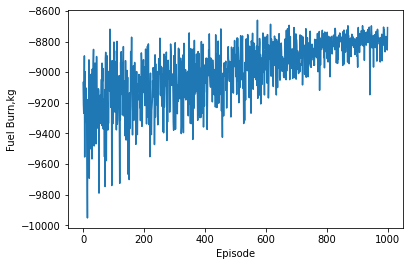

In [10]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('/home/shakhov/Downloads/run-May31_18-29-24_hyperion-tag-EpisodeFuel.csv')
df2 = pd.read_csv('/home/shakhov/Downloads/run-May31_18-40-25_hyperion-tag-EpisodeFuel.csv')

import matplotlib.pyplot as plt
plt.ylabel('Fuel Burn,kg')
plt.xlabel('Episode')

# pd.Series(rewards).rolling(window =100).mean().plot()
# plt.plot(np.concatenate([df1["Step"].values, df1["Step"].values + df2["Step"].values]),
#          np.concatenate([df1["Value"].values, df2["Value"].values]))
plt.plot(df2['Value'])
# plt.savefig('QTable-plot.png',bbox_inches='tight')

In [ ]:
env.cruise_alt_max